In [1]:
#Localization : 
# Part -1 ICP Localization
#In the ICP localization part of the project you will perform the localization of the car in the given map using the Iterative Closest Point algorithm. You can use the libraries provided by PCL library in c++ or Open3D in Python. This part of the project involves implementing the following series of tasks:

#Load the map from the map.pcd file.
#Iteritatively go through each frame and localize the car in the given map.
#Extract point cloud information from the dataset provided.
#Configure the ICP module to localize the vehicle.
#Remember that for this task, the maximum lateral error shouldn't be bigger than 1.2 meters.
##Also evaluate the computing time. There is not a harsh requirement here, but should be analyzed.

In [2]:
import open3d as o3d
import os
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
#Load the map from the map.pcd file.


In [4]:
# Load map point cloud
map_cloud = o3d.io.read_point_cloud("map.pcd")

# Load frames directory
frames_dir = "frames"

# Load ground truth poses
ground_truth_file = "ground_truth.csv"
ground_truth = pd.read_csv(ground_truth_file)
 

# Print gt
print(ground_truth)

# Initialize Open3D visualizer
#visualizer = o3d.visualization.Visualizer()
#visualizer.create_window()

# Create a list to store frame images
#frame_images = []

# Create a matplotlib figure
#fig, ax = plt.subplots()
def show_pcl(pcl: np.ndarray):
    
    pointcloud = o3d.geometry.PointCloud()
    pointcloud.points = o3d.utility.Vector3dVector(pcl[:,:3])

    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(pointcloud)
    
    opt = vis.get_render_option()
    opt.background_color = (0, 0, 0)
    opt.point_size = 2

    vis.run()
    vis.destroy_window()
    # Example of how to visualize the map and a frame
#Map Visualization
    show_pcl(map_array)
#### Frame Visualization
    show_pcl(pointcloud_array)
    del opt  # Delete to avoid having  [Open3D ERROR] GLFW Error: The GLFW library is not initialized
    del vis  # Delete to avoid having  [Open3D ERROR] GLFW Error: The GLFW library is not initialized

      Frame        x        y         z      roll     pitch       yaw
0         0    0.000  0.00000  0.000000  0.000000  0.000000  0.000000
1         1    0.000  0.00000  0.015636  0.000000  0.000000  0.000000
2         2    0.000  0.00000  0.005846  0.000000  0.000000  0.000000
3         3    0.000  0.00000  0.005628  0.000000  0.000000  0.000000
4         4    0.000  0.00000  0.005628  0.000000  0.000000  0.000000
...     ...      ...      ...       ...       ...       ...       ...
1009   1009  182.299  5.29271 -0.018730 -0.029093 -0.014225  0.019378
1010   1010  182.299  5.27850 -0.023267 -0.030727 -0.015000  0.019204
1011   1011  182.299  5.28007 -0.014406 -0.028470 -0.012781  0.019203
1012   1012  182.299  5.27980 -0.023047 -0.035554 -0.017184  0.019364
1013   1013  182.299  5.28085 -0.024493 -0.030387  0.000000  0.000000

[1014 rows x 7 columns]


In [5]:
#Iteritate go through each frame and localize the car in the given map.

AttributeError: 'FigureCanvasAgg' object has no attribute 'renderer'

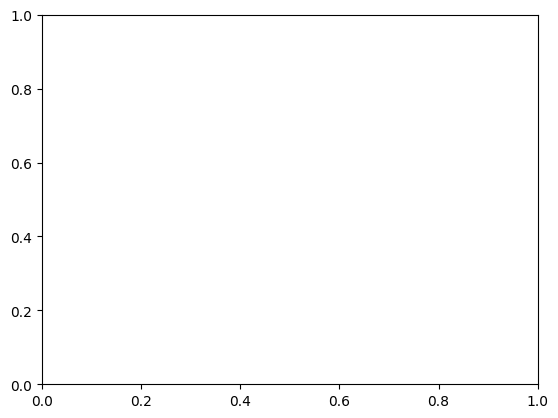

In [25]:
import os
import numpy as np
import open3d as o3d
import networkx as nx
import matplotlib.pyplot as plt

# Define the directory containing the frames and the map point cloud file
frames_dir = "frames"
map_cloud_file = "C:/Users/Praveen/Downloads/Localization_Project/dataset/map.pcd"  

# Define ground truth poses (assuming you have them)
ground_truth = {}  # You should populate this dictionary with ground truth poses

# List to store frame images
frame_images = []  

# Load the map point cloud
map_cloud = o3d.io.read_point_cloud(map_cloud_file)

# Create a directed graph to store the visualization data
G = nx.DiGraph()

# Create a matplotlib figure and axis for displaying images
fig, ax = plt.subplots()

# Iterate through each frame
for filename in sorted(os.listdir(frames_dir)):
    if filename.endswith(".pcd"):
        # Load frame point cloud
        frame_cloud = o3d.io.read_point_cloud(os.path.join(frames_dir, filename))

        # Split filename to extract frame number
        filename_parts = os.path.splitext(filename)[0].split("_")
        if len(filename_parts) < 2:
            print(f"Ignoring file {filename}: Unable to extract frame number from filename.")
            continue

        # Extract frame number from filename
        try:
            frame_number = int(filename_parts[1])
        except ValueError:
            print(f"Ignoring file {filename}: Frame number is not a valid integer.")
            continue

        # Get ground truth pose for this frame
        gt = ground_truth.get(frame_number)  # Use .get() to handle missing keys gracefully

        # Perform ICP localization
        icp_result = o3d.pipelines.registration.registration_icp(
            frame_cloud, map_cloud, max_correspondence_distance=0.05,
            criteria=o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=200)
        )

        # Transform the frame according to the ICP result
        transformed_frame = frame_cloud.transform(icp_result.transformation)

        # Add nodes and edges to the graph
        G.add_node(frame_number, pose=gt)  # Add node representing frame with ground truth pose
        if frame_number > 0:
            G.add_edge(frame_number - 1, frame_number, transformation=icp_result.transformation)
        
        # Visualize the result
        o3d.visualization.draw_geometries([map_cloud, transformed_frame])

        # Convert the visualization to an image
        img = fig.canvas.renderer.buffer_rgba()
        img = np.array(img)

        # Display the captured image
        ax.imshow(img)
        plt.pause(0.001)  # Pause to display the image

# Save the graph as GraphML
nx.write_graphml(G, "visualization.graphml")

print("Localization completed and visualization saved as graph.")

# Check the number of nodes and edges in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())






 

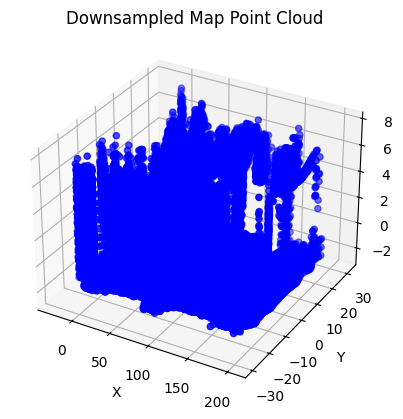

In [27]:
#Downsample
voxel_size = 0.05  # Define the voxel size
map_cloud_downsampled = map_cloud.voxel_down_sample(voxel_size)  # Downsample the map point cloud
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert downsampled point cloud to numpy array
map_points_downsampled = np.asarray(map_cloud_downsampled.points)

# Plot the downsampled point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(map_points_downsampled[:, 0], map_points_downsampled[:, 1], map_points_downsampled[:, 2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Downsampled Map Point Cloud')
plt.show()


In [15]:
#Configure the ICP module to localize the vehicle:
 

In [31]:
# Define ICP parameters
max_correspondence_distance = 0.1  # Maximum correspondence distance
max_iteration = 50  # Maximum number of iterations
icp_criteria = o3d.pipelines.registration.ICPConvergenceCriteria(relative_fitness=1e-6, relative_rmse=1e-6, max_iteration=max_iteration)

# Configure ICP
icp_method = o3d.pipelines.registration.TransformationEstimationPointToPoint()



In [29]:
#Use performance measures to evaluate the localization effectiveness:

In [30]:
def evaluate_localization_error(ground_truth_pose, estimated_pose):
    # Calculate position error
    position_error = np.linalg.norm(ground_truth_pose[:3] - estimated_pose[:3])

    # Calculate orientation error (assuming euler angles representation)
    orientation_error = np.linalg.norm(ground_truth_pose[3:] - estimated_pose[3:])
    
    return position_error, orientation_error

# Calculate errors
position_error, orientation_error = evaluate_localization_error(ground_truth_pose, estimated_pose)


NameError: name 'ground_truth_pose' is not defined

In [ ]:
#Evaluate the computing time

In [ ]:
import time

start_time = time.time()

# Perform ICP localization
icp_result = o3d.pipelines.registration.registration_icp(
    frame_cloud_downsampled, map_cloud_downsampled, max_correspondence_distance,
    init=np.identity(4),  # Initial transformation matrix
    estimation_method=icp_method,
    criteria=icp_criteria
)

end_time = time.time()
computation_time = end_time - start_time
